# Biodiversity in National Parks

## Introduction

For this project, we will interpret data from the National Parks Service about endangered species in different parks.

In the following sections, we will enumerate the goals of the project, the data we will use and the analysis we will follow.

Once we perform the analysis, we will share the findings about the National Park Service.

## Project Goals

The main goal of the project is to investigate if there are any patterns or themes to the types of species that become endangered. 

 The questions we want to answer to investigate patterns are:

- What is the distribution of conservation status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which category were spotted the most at each park?


However, we should keep in mind the project will only analyzed patterns for a specific point in time. In order to carry on a deeper analysis, we should also use data of the species observations over a certain period of time. That way, we could see the evolution of the species' conservation status.

## Data

For this project, we will use 2 sets of data in csv format:
- The first set of data cointains information about the species we can find in US National Parks
    - category - class of animal
    - scientific_name - the scientific name of each species
    - common_name - the common names of each species
    - conservation_status - each species’ current conservation status
- The second set of data contains observations of each species
    - scientific_name - the scientific name of each species
    - park_name - Park where species were found
    - observations - the number of times each species was observed at park

## Analysis

During this project, we will clean up, analyze, and plot data as well as pose questions and seek to answer them in a meaningful way.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import math

### Load, Explore and Clean

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
species.rename(columns={'common_names': 'common_name'}, inplace = True)
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_name          5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species.fillna('not_protected', inplace=True)
species.head()

,category,scientific_name,common_name,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_protected
1,Mammal,Bos bison,"American Bison, Bison",not_protected
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",not_protected
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",not_protected
4,Mammal,Cervus elaphus,Wapiti Or Elk,not_protected


In [5]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_name          5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [6]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
observations.rename(columns={'park_name': 'park'}, inplace = True)
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park             23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
observations['total'] = observations.groupby(['scientific_name', 'park'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park             22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [9]:
print(f'Number of categories: {species.category.nunique()}')
print(f'Name of the categories: {species.category.unique()}')

Number of categories: 7
Name of the categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [10]:
print(f'Number of conservation status: {species.conservation_status.nunique()}')
print(f'Name of the conservation status: {species.conservation_status.unique()}')

Number of conservation status: 5
Name of the conservation status: ['not_protected' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [11]:
species.conservation_status.fillna('Not Endangered')
print(f'Name of the conservation status: {species.conservation_status.unique()}')

Name of the conservation status: ['not_protected' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [12]:
print(f'Number of parks: {observations.park.nunique()}')
print(f'Name of the parks: {observations.park.unique()}')

Number of parks: 4
Name of the parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [13]:
#option 1
species.groupby('category').size()

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64

In [14]:
#option 2
species['category'].value_counts()

Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
Name: category, dtype: int64

In [15]:
#option 3
category_df = pd.DataFrame(list(species['category'].value_counts().items()), 
                           columns = ['Category', 'Total'])
category_df

,Category,Total
0,Vascular Plant,4262
1,Bird,488
2,Nonvascular Plant,333
3,Mammal,176
4,Fish,125
5,Amphibian,79
6,Reptile,78


In [16]:
#count
species['conservation_status'].value_counts()

not_protected         5362
Species of Concern     151
Endangered              15
Threatened              10
In Recovery              3
Name: conservation_status, dtype: int64

In [17]:
#frequencies
species['conservation_status'].value_counts(normalize = True)

not_protected         0.967695
Species of Concern    0.027251
Endangered            0.002707
Threatened            0.001805
In Recovery           0.000541
Name: conservation_status, dtype: float64

### Analysis & Graphs

**- What is the distribution of conservation status for species?**

In [18]:
conservation_category = species[species['conservation_status'] != 'not_protected']\
.groupby(['conservation_status', 'category'])\
['scientific_name'].count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


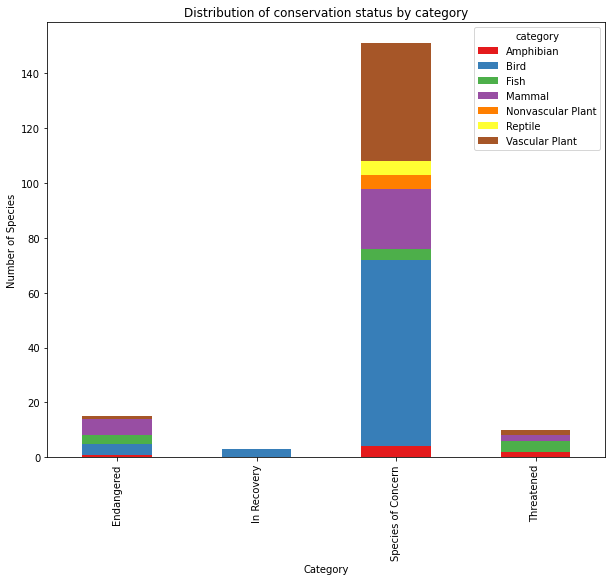

<Figure size 432x288 with 0 Axes>

In [19]:
sns.set_palette('Set1')
ax = conservation_category.plot(kind = 'bar', figsize=(10,8), 
                               stacked=True, label)
ax.set_xlabel("Category")
ax.set_ylabel("Number of Species")
plt.title('Distribution of conservation status by category')
plt.show()
plt.clf()

**- Are certain types of species more likely to be endangered?**

To answer this question, we need to know the percentage of protected species within each category.

To accomplish this, first, we will add a column to the dataframe "species" to check what species are protected.

In [20]:
species['is_protected'] = species['conservation_status'] != 'not_protected'
species.head()

,category,scientific_name,common_name,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_protected,False
1,Mammal,Bos bison,"American Bison, Bison",not_protected,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",not_protected,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",not_protected,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True


Then, we will create a new dataframe with the counts of protected and not protected species within every category

In [21]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,114,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Finally, we will add a column to the df "category_counts" with the percentage of species protected per category

In [22]:
category_counts['percentage_protected'] = round(category_counts['protected']\
                /(category_counts['not_protected'] + category_counts['protected']) * 100, 2)
category_counts

,category,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,114,11,8.80
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


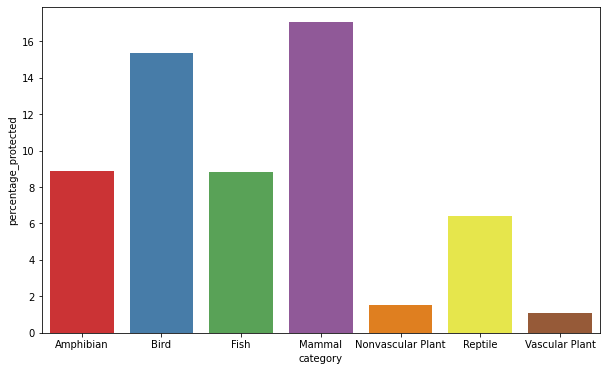

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = category_counts, x = 'category', y = 'percentage_protected')
plt.show()
plt.clf()

Most of the species with any level of protection belong to the categories of Mammal and Birds. The least endangered species is plants. 

**- Are the differences between species and their conservation status significant?**

To check if there are significant differences between species and their conservation status, we will run a chi squared test.

Before running the chi squared test, we need to create a contingency table with the 2 categories we want to compare.

In the first test, we will compare Mammals with Birds.

In [24]:
contingency_m_b = [[30, 146], [75, 413]]
chi2_contingency(contingency_m_b)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

Let's try another test with mammals and fish.

In [25]:
contingency_m_f = [[30, 146], [11, 115]]
chi2_contingency(contingency_m_f)

(3.647651024981415,
 0.0561483484489001,
 1,
 array([[ 23.89403974, 152.10596026],
        [ 17.10596026, 108.89403974]]))

The p-value is 0.056, not much bigger than 0.05 so we could say the the relationship between mammals and fish is marginally significant.

**- Which category were spotted the most at each park?**

In [33]:
conservation_park = pd.merge(species, observations, on = 'scientific_name')
conservation_park

,category,scientific_name,common_name,conservation_status,is_protected,park,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_protected,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_protected,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_protected,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_protected,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",not_protected,False,Yosemite National Park,128
...,...,...,...,...,...,...,...
22159,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",not_protected,False,Yellowstone National Park,237
22160,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",not_protected,False,Great Smoky Mountains National Park,50
22161,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",not_protected,False,Yellowstone National Park,239
22162,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",not_protected,False,Bryce National Park,111


In [34]:
park_counts = conservation_park.groupby(['park', 'category'])\
                        .observations.sum()\
                        .reset_index()\
                        .pivot(columns='park',
                                      index='category',
                                      values='observations')\
                        .reset_index()
park_counts

park,category,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
0,Amphibian,7380,5707,19440,11444
1,Bird,51647,37728,127251,76207
2,Fish,12423,9206,30574,18615
3,Mammal,20550,15012,50795,30339
4,Nonvascular Plant,32992,24857,83021,49783
5,Reptile,7950,5691,19554,11483
6,Vascular Plant,443083,333619,1112927,665461


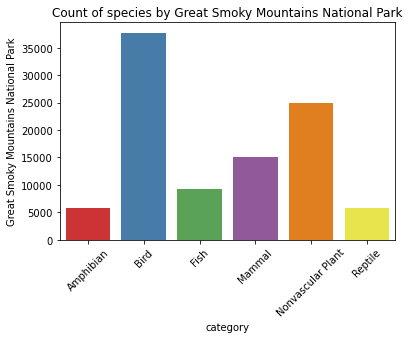

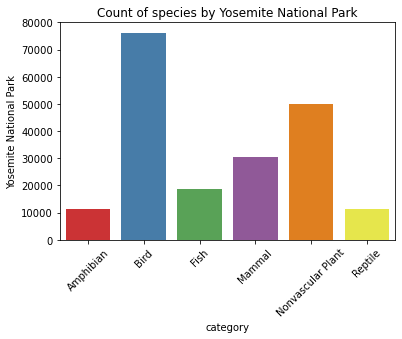

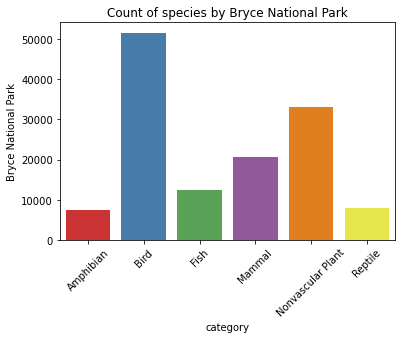

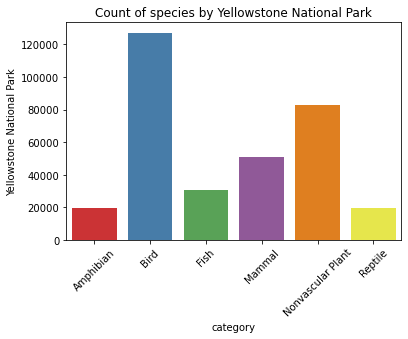

In [35]:
def barplot(park):
    sns.barplot(data = park_counts[park_counts['category'] != 'Vascular Plant'], x = 'category', y = park)
    plt.xticks(rotation = 45)
    plt.title('Count of species by {}'.format(park))
    plt.show()

for i in observations.park.unique():
    barplot(i)



In [40]:
#sum total values in each column (much easier with sql....)
park_counts.loc['Total'] = park_counts.select_dtypes(np.number).sum()
park_counts

park,category,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
0,Amphibian,7380.0,5707.0,19440.0,11444.0
1,Bird,51647.0,37728.0,127251.0,76207.0
2,Fish,12423.0,9206.0,30574.0,18615.0
3,Mammal,20550.0,15012.0,50795.0,30339.0
4,Nonvascular Plant,32992.0,24857.0,83021.0,49783.0
5,Reptile,7950.0,5691.0,19554.0,11483.0
6,Vascular Plant,443083.0,333619.0,1112927.0,665461.0
Total,NaN,1728075.0,1295460.0,4330686.0,2589996.0


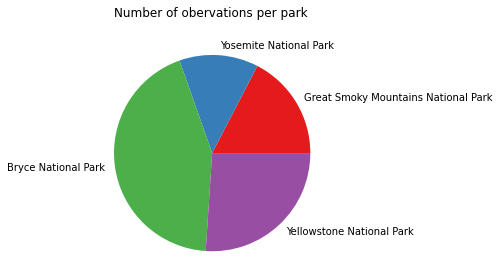

In [54]:
plt.pie(park_counts.select_dtypes(np.number).sum(), labels = observations.park.unique())
plt.axis('equal')
plt.title('Number of obervations per park', y = 1.1)
plt.show()

## Conclusions

- There is no difference among parks for distribution of species
- Bryce National Park has the highest number of observations
- The most endangered species within the parks are mammals and birds. However, mammals have more species "endangered" or "threaten", and birds have more species within "species of concern" and "recovery"